#Non-Stationary Problem tracking

In [0]:
import numpy as np
from random import randrange
import matplotlib.pyplot as plt

First we want to see if our comparitive analysis works as expected in a singular, 10000 timestep run. Later we will average our results for 2000 such runs and plot the same. We wish to compare the performance of two approaches commonly used for tracking a stationary bandit problem on a nonstationary problem - a modified version of the 10 armed testbed. The Sample mean method gives equal precedence to all rewards no matter how long ago the information was received whereas the constant step size alpha gives higher precedence to recently received rewards which makes it more likely to fare well in the non stationary case

In [0]:
def GenWalks():
  A=np.random.normal(0,0.01,10)
  return A

The GenWalks function will be used to update the **true** values associated with the 10 arms at the end of each of the 10000 timesteps 

In [0]:
def GenReward(arm, trueVals):
  A=np.zeros(10)
  for i in range(10):
    A[i]=np.random.normal(trueVals[i], 1)
  return A

The GenReward takes as arguments the arm selected along with the array of true values associated with the arms and returns a reward randomly from a normal(true value of arm, 1) distribution

In [0]:
def ArmPull(Estimates):
  s=randrange(10)
  if(s==1):
    return randrange(10)
  else:
    i=0
    for k in range(10):
      if(Estimates[k]>Estimates[i]):
        i=k
    return i

The ArmPull function takes in an array of estimated values for the 10 arms and returns the index of the arm we should pull based on an epsilon greedy approach. Epsilon being 0.1.

In [0]:
def UpdateSampleMean(Rt, Qtminus1, n):
  Qt=Qtminus1 + ((Rt-Qtminus1)/n)
  return Qt

Given current reward, old value estimate and number of times the arm has been selected, the UpdateSampleMean function returns the updated sample mean estimate for the value of the arm.

In [0]:
def UpdateConstAlpha(Rt, Qtminus1):
  alpha=0.1
  Qt=Qtminus1 + ((Rt-Qtminus1)*alpha)
  return Qt

Given current reward and old value estimate, the UpdateConstAlpha function returns the updated constant step size alpha estimate for the value of the arm. Alpha is set to 0.1

In [0]:
arr0=np.zeros(10)  #true values
arr1=np.zeros(10)  #estimates using sample mean
arr11=np.zeros(10) #number of times each action has been picked - for sample mean estimation
arr2=np.zeros(10)  #estimates using constant step size alpha
maxval=0 #Maximum true value out of all the arms' true values

The above arrays store value and estimate related information

In [0]:
Reward_SampleMean = np.zeros(10000) #reward received by sample mean method at every timestep
Reward_ConstAlpha = np.zeros(10000) #reward received by constant step size method at every timestep
#part of both old and new

Storage of reward at each stage will help us calculate the Average reward accumulated at each stage

In [0]:
AvgRewards_SampleMean = np.zeros(10000) #avg reward to be calculated using Reward_SampleMean array
AvgRewards_ConstAlpha = np.zeros(10000) #same except using Reward_ConstAlpha

Next we would like to document the percentage/average percentage of being able to pick the optimal action for both methods

In [0]:
BinOptimal_SM = np.zeros(10000) #Whether or not the action picked at each timestep by Sample Mean method was the optimal action
BinOptimal_CA = np.zeros(10000) #the same except for constant step size alpha method

PercentAvg_SM = np.zeros(10000)
PercentAvg_CA = np.zeros(10000) #translate the numbers to percentages and plot

Now that all our storage elements and methods are ready to be used, we can start coding our singular run

In [0]:
for i in range(10000):
  
  SampleMeanArm = ArmPull(arr1)
  arr11[SampleMeanArm]+=1
  ConstAlphaArm = ArmPull(arr2)
  #We now have the epsilon-greedy chosen arm and we must see if the optimal arm has been chosen
  
  if(arr0[SampleMeanArm]==np.amax(arr0)):
    BinOptimal_SM[i]=1.0
  if(arr0[ConstAlphaArm]==np.amax(arr0)):
    BinOptimal_CA[i]=1.0
  #Once the optimality arrays have been updated we want to reap the rewards associated with the chosen arms
  
  Rwd=GenReward(SampleMeanArm, arr0)
  SampleMeanReward = Rwd[SampleMeanArm]
  ConstAlphaReward = Rwd[ConstAlphaArm]
  #We have now received our rewards and wish to update our estimation arrays for both methods
  
  arr1[SampleMeanArm]=UpdateSampleMean(SampleMeanReward, arr1[SampleMeanArm], arr11[SampleMeanArm])
  #SampleMean estimate updated
  arr2[ConstAlphaArm]=UpdateConstAlpha(ConstAlphaReward, arr2[ConstAlphaArm])
  #ConstAlpha estimate updated
  #Now that the estimation arrays have been updated we must also update the reward array for each method
  
  Reward_SampleMean[i]=SampleMeanReward
  Reward_ConstAlpha[i]=ConstAlphaReward
  #The reward matrices have also been updated and all that remains now is to set the true values on their random walks and iterate again
  
  arr0=arr0+GenWalks()

Now that all of our iterations have been completed we wish to plot the performances of both enlisted methods

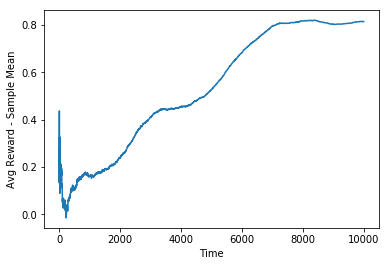

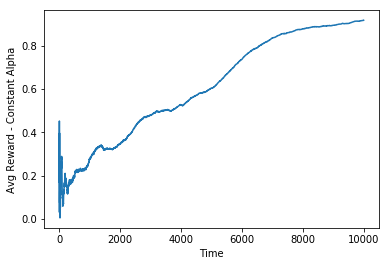

In [15]:
#Average Rewards using Sample Mean method
AvgRewards_SampleMean[0]=Reward_SampleMean[0]
for j in range(1,10000):
  AvgRewards_SampleMean[j]=AvgRewards_SampleMean[j-1]+((Reward_SampleMean[j]-AvgRewards_SampleMean[j-1])/(j+1))
plt.plot(AvgRewards_SampleMean)
plt.ylabel('Avg Reward - Sample Mean')
plt.xlabel('Time')
plt.show()

#Average Rewards using Constant Step Size alpha method
AvgRewards_ConstAlpha[0]=Reward_ConstAlpha[0]
for j in range(1,10000):
  AvgRewards_ConstAlpha[j]=AvgRewards_ConstAlpha[j-1]+((Reward_ConstAlpha[j]-AvgRewards_ConstAlpha[j-1])/(j+1))
plt.plot(AvgRewards_ConstAlpha)
plt.ylabel('Avg Reward - Constant Alpha')
plt.xlabel('Time')
plt.show()

As we can see, Constant step size method ends up with a better average reward as we would expect it to do

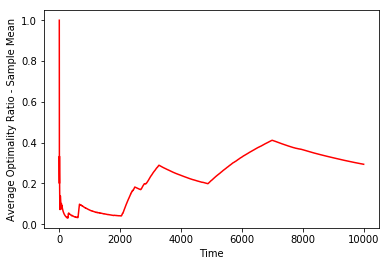

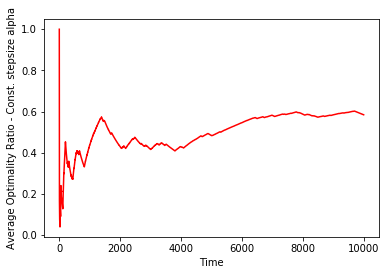

In [16]:
PercentAvg_SM[0]=1.0
count=1.0
for j in range(1,10000):
  if(BinOptimal_SM[j]==1.0):
    count+=1.0
  PercentAvg_SM[j]=count/(j+1)
plt.plot(PercentAvg_SM, 'r-')
plt.ylabel('Average Optimality Ratio - Sample Mean')
plt.xlabel('Time')
plt.show()

PercentAvg_CA[0]=1.0
count=1.0
for j in range(1,10000):
  if(BinOptimal_CA[j]==1.0):
    count+=1.0
  PercentAvg_CA[j]=count/(j+1)
plt.plot(PercentAvg_CA, 'r-')
plt.ylabel('Average Optimality Ratio - Const. stepsize alpha')
plt.xlabel('Time')
plt.show()

Once again, the constant step size method performs better than the Sample Mean method as we would expect it to

Now we average this over 1000 runs

--------------------------

We want four arrays for averageing the results received over 1000 runs

In [0]:
FinalRewards_ConstAlpha = np.zeros(10000)
FinalRewards_SampleMean = np.zeros(10000)

PercentFinal_SM= np.zeros(10000)
PercentFinal_CA= np.zeros(10000)

We now wish to run ALL the code above 1000 times and store the averaged results in these4 arrays 

In [0]:
for k in range(1000):
  arr0=np.zeros(10)  #true values
  arr1=np.zeros(10)  #estimates using sample mean
  arr11=np.zeros(10) #number of times each action has been picked - for sample mean estimation
  arr2=np.zeros(10)  #estimates using constant step size alpha
  maxval=0 #Maximum true value out of all the arms' true values

  Reward_SampleMean = np.zeros(10000) #reward received by sample mean method at every timestep
  Reward_ConstAlpha = np.zeros(10000) #reward received by constant step size method at every timestep
  #part of both old and new

  AvgRewards_SampleMean = np.zeros(10000) #avg reward to be calculated using Reward_SampleMean array
  AvgRewards_ConstAlpha = np.zeros(10000) #same except using Reward_ConstAlpha

  BinOptimal_SM = np.zeros(10000) #Whether or not the action picked at each timestep by Sample Mean method was the optimal action
  BinOptimal_CA = np.zeros(10000) #the same except for constant step size alpha method

  PercentAvg_SM = np.zeros(10000)
  PercentAvg_CA = np.zeros(10000) #translate the numbers to percentages and plot

  for i in range(10000):

    SampleMeanArm = ArmPull(arr1)
    arr11[SampleMeanArm]+=1
    ConstAlphaArm = ArmPull(arr2)
    #We now have the epsilon-greedy chosen arm and we must see if the optimal arm has been chosen

    if(arr0[SampleMeanArm]==np.amax(arr0)):
      BinOptimal_SM[i]=1.0
    if(arr0[ConstAlphaArm]==np.amax(arr0)):
      BinOptimal_CA[i]=1.0
    #Once the optimality arrays have been updated we want to reap the rewards associated with the chosen arms

    Rwd=GenReward(SampleMeanArm, arr0)
    SampleMeanReward = Rwd[SampleMeanArm]
    ConstAlphaReward = Rwd[ConstAlphaArm]
    #We have now received our rewards and wish to update our estimation arrays for both methods

    arr1[SampleMeanArm]=UpdateSampleMean(SampleMeanReward, arr1[SampleMeanArm], arr11[SampleMeanArm])
    #SampleMean estimate updated
    arr2[ConstAlphaArm]=UpdateConstAlpha(ConstAlphaReward, arr2[ConstAlphaArm])
    #ConstAlpha estimate updated
    #Now that the estimation arrays have been updated we must also update the reward array for each method

    Reward_SampleMean[i]=SampleMeanReward
    Reward_ConstAlpha[i]=ConstAlphaReward
    #The reward matrices have also been updated and all that remains now is to set the true values on their random walks and iterate again

    arr0=arr0+GenWalks()
  
  #Average Rewards using Sample Mean method
  AvgRewards_SampleMean[0]=Reward_SampleMean[0]
  for j in range(1,10000):
    AvgRewards_SampleMean[j]=AvgRewards_SampleMean[j-1]+((Reward_SampleMean[j]-AvgRewards_SampleMean[j-1])/(j+1))
  for j in range(10000):
    FinalRewards_SampleMean[j]=UpdateSampleMean(FinalRewards_SampleMean[j], AvgRewards_SampleMean[j], k+1) 

  #Average Rewards using Constant Step Size alpha method
  AvgRewards_ConstAlpha[0]=Reward_ConstAlpha[0]
  for j in range(1,10000):
    AvgRewards_ConstAlpha[j]=AvgRewards_ConstAlpha[j-1]+((Reward_ConstAlpha[j]-AvgRewards_ConstAlpha[j-1])/(j+1))
  for j in range(10000):
    FinalRewards_ConstAlpha[j]=UpdateSampleMean(FinalRewards_ConstAlpha[j], AvgRewards_ConstAlpha[j], k+1) 
  
  PercentAvg_SM[0]=1.0
  count=1.0
  for j in range(1,10000):
    if(BinOptimal_SM[j]==1.0):
      count+=1.0
    PercentAvg_SM[j]=count/(j+1)
  for j in range(10000):
    PercentFinal_SM[j]=UpdateSampleMean(PercentFinal_SM[j], PercentAvg_SM[j], k+1) 

  PercentAvg_CA[0]=1.0
  count=1.0
  for j in range(1,10000):
    if(BinOptimal_CA[j]==1.0):
      count+=1.0
    PercentAvg_CA[j]=count/(j+1)
  for j in range(10000):
    PercentFinal_CA[j]=UpdateSampleMean(PercentFinal_CA[j], PercentAvg_CA[j], k+1) 


We now plot the final comparison

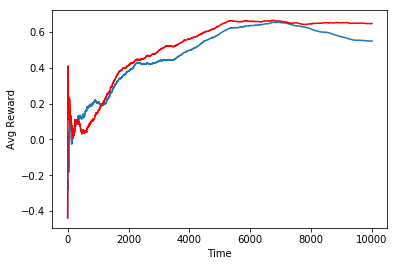

In [19]:
plt.plot(FinalRewards_SampleMean)
plt.plot(FinalRewards_ConstAlpha, 'r-')
plt.ylabel('Avg Reward')
plt.xlabel('Time')
plt.show()

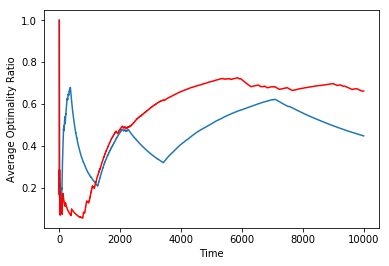

In [20]:
plt.plot(PercentFinal_SM)
plt.plot(PercentFinal_CA, 'r-')
plt.ylabel('Average Optimality Ratio')
plt.xlabel('Time')
plt.show()

As we can see, the overall performance of the constant step size alpha method is better than that of the sample mean method. This is expected as Sample mean method gives higher precedence to very old rewards which is not a good way to go in a constantly changing system. However, neither performs significantly better than the other because neither method is fit to deal with non-stationary problems. Also in this particular case, the overall change in the true values is normally distributed around zero which means that the true values will circle around their initial value always and not end up going too far from it. This makes the performance of the sample mean method only a little worse than that of the constant step size method while it could have been significantly worse.